![](https://miro.medium.com/v2/resize:fit:1400/1*WqId29D5dN_8DhiYQcHa2w.png)

# **Importing Libraries**

---



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# **Loading the Data**

---





In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **EDA**

---



In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.shape

(10000, 14)

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['Exited'].value_counts()
# Now we can see how many users exited our credit card

,count
Exited,
0,7963
1,2037


In [10]:
df['Geography'].value_counts()
#We can see the credit card users all over different countries.

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [11]:
df['Gender'].value_counts()
#We can see the gender distribution

,count
Gender,
Male,5457
Female,4543


In [12]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'] , axis = 1)
#Dropping the unnecessary columns

In [13]:
#after removing columns
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA Visualization



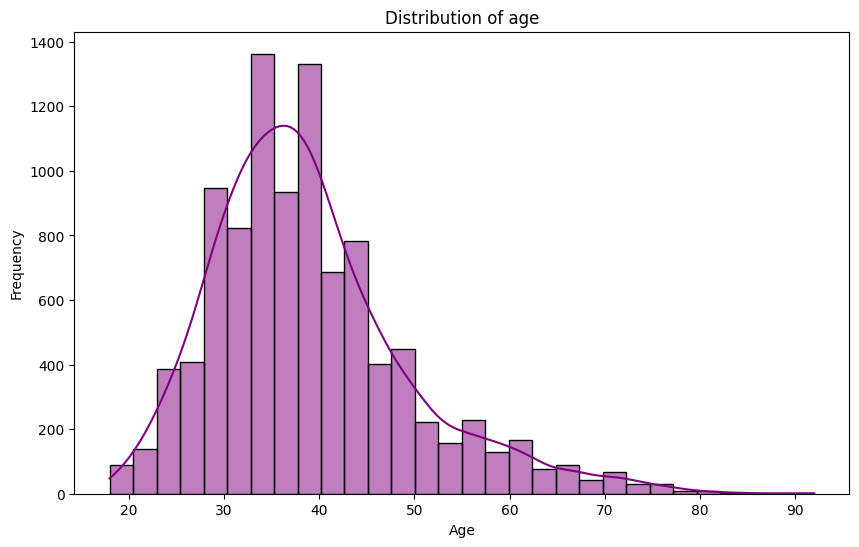

In [14]:
# Plot 1: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30,color='purple',kde=True)
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Observation- As per the graph we have maximum user in range btw 30-40

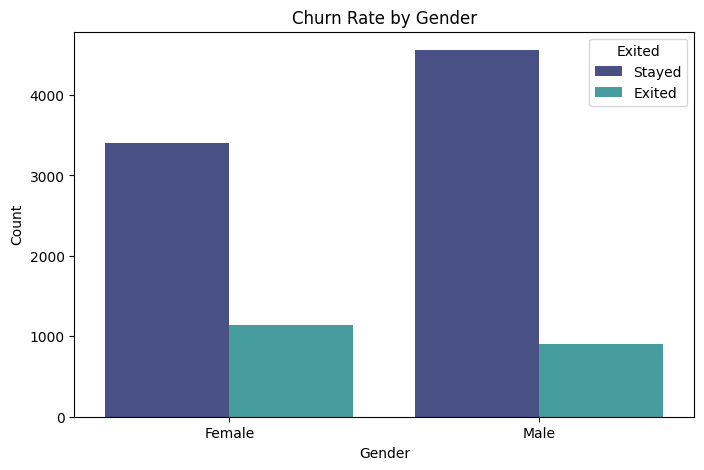

In [15]:
# Plot 2: Churn Rate by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Exited', data=df, palette="mako")
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Stayed', 'Exited'])
plt.show()

Observation- As per the graph female users exited more over the male users

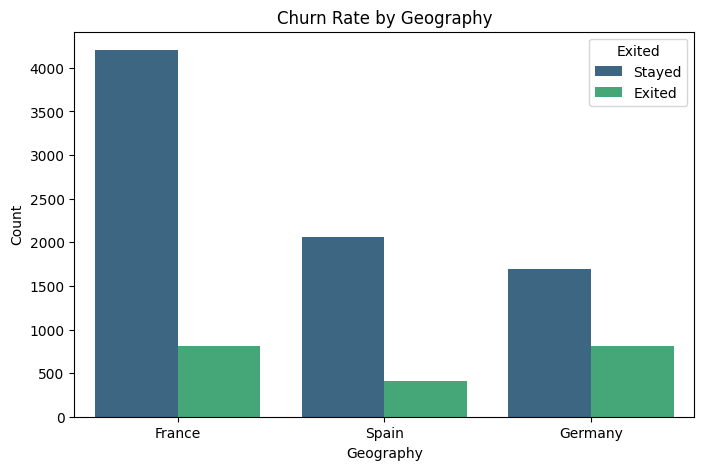

In [16]:
# Plot 3: Churn Rate by Geography
plt.figure(figsize=(8, 5))
sns.countplot(x='Geography', hue='Exited', data=df, palette='viridis')
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Stayed', 'Exited'])
plt.show()

Observation-


1.  As per the graph we can see that France have more stayed users than the rest of the countries.

2.   Germany users are exiting at a 50% ratio







# **One-Hot Encoding**

---



In [17]:
data = pd.get_dummies(df , columns = ['Geography' , 'Gender'] , drop_first = True)
data = data.astype(int)

In [18]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


# **Data Splitting**

---



In [19]:
X = data.drop(['Exited'] , axis = 1)
y = data['Exited']

In [20]:
X_train , X_test , y_train , y_test =train_test_split(X , y , test_size = 0.2 , random_state = 42)

# **Feature Scaling**

---



In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

# **Building The ANN Model Architecture**

---



## 🤖 ANN Architecture
- Input Layer: Based on number of features
- Hidden Layers:
  - Dense layer with ReLU activation
  - Dropout for regularization
- Output Layer:
  - Sigmoid activation for binary classification


In [23]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import plot_model

In [24]:
model = Sequential()
model.add(Dense(5 , activation = 'relu' , input_dim = 11))
model.add(Dense(10 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

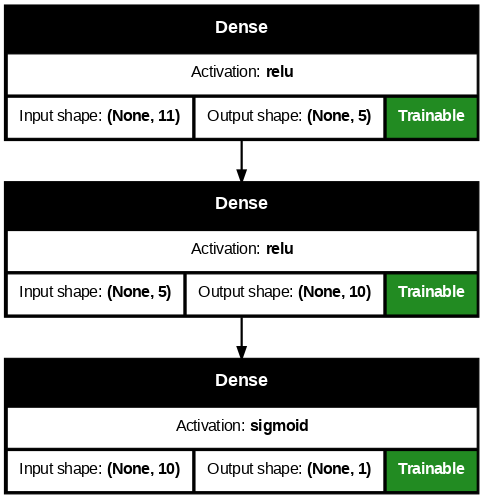

In [25]:
plot_model(
    model ,
    show_shapes = True ,
    dpi = 80,
    show_layer_activations = True,
    show_trainable = True
)

In [26]:
model.compile(loss ='binary_crossentropy' , optimizer = 'Adam' , metrics=['accuracy'])

# **Training the model**

---



In [27]:
history= model.fit(X_train , y_train , epochs = 100 ,validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7951 - loss: 0.5302 - val_accuracy: 0.7987 - val_loss: 0.4687
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7951 - loss: 0.4688 - val_accuracy: 0.7987 - val_loss: 0.4492
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7958 - loss: 0.4445 - val_accuracy: 0.7987 - val_loss: 0.4404
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7920 - loss: 0.4462 - val_accuracy: 0.7987 - val_loss: 0.4350
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7953 - loss: 0.4337 - val_accuracy: 0.7987 - val_loss: 0.4327
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7937 - loss: 0.4342 - val_accuracy: 0.7987 - val_loss: 0.4289
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7998 - loss: 0.4250 - val_accuracy: 0.8175 - val_loss: 0.4264
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8188 - loss: 0.4310 - val_accu

# **Prediction on Test Data**

---



In [28]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [29]:
Y_pred = np.where(y_pred > 0.5 , 1 , 0)
# 0 Representing stayed and 1 Representing exited

In [30]:
Y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [31]:
accuracy_score(y_test , Y_pred)

0.8655

In [32]:
X_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [33]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

## **Results**

In [34]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt


In [35]:
# Predict probabilities
y_prob = model.predict(X_test)

# Convert probabilities to class labels (threshold = 0.5)
y_pred = (y_prob > 0.5).astype(int)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [36]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", round(accuracy, 4))
print("Precision (Churn):", round(precision, 4))
print("Recall (Churn):", round(recall, 4))
print("F1-Score:", round(f1, 4))
print("ROC-AUC:", round(roc_auc, 4))


Accuracy: 0.8655
Precision (Churn): 0.7541
Recall (Churn): 0.4682
F1-Score: 0.5777
ROC-AUC: 0.8551


In [37]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm,
    index=["Actual Non-Churn", "Actual Churn"],
    columns=["Predicted Non-Churn", "Predicted Churn"]
)

cm_df


,Predicted Non-Churn,Predicted Churn
Actual Non-Churn,1547,60
Actual Churn,209,184


In [38]:
print(classification_report(y_test, y_pred, target_names=["Non-Churn", "Churn"]))


              precision    recall  f1-score   support

   Non-Churn       0.88      0.96      0.92      1607
       Churn       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



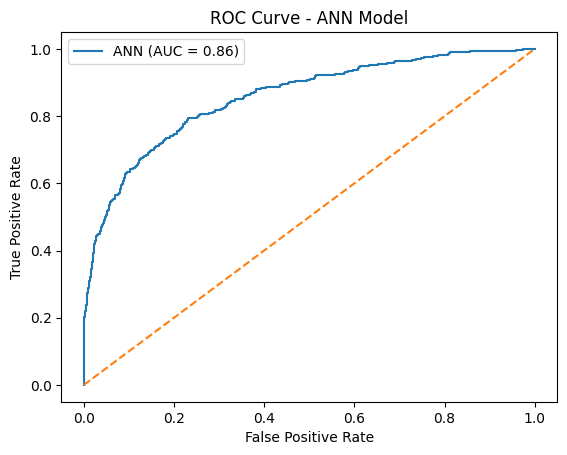

In [39]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"ANN (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - ANN Model")
plt.legend()
plt.show()


In [40]:
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"],
    "Value": [accuracy, precision, recall, f1, roc_auc]
})

metrics_df


,Metric,Value
0,Accuracy,0.865500
1,Precision,0.754098
2,Recall,0.468193
3,F1-Score,0.577708
4,ROC-AUC,0.855058


In [41]:
# Save ANN model
model.save("model.h5")

# Save scaler
import pickle
pickle.dump(scaler, open("scaler.pkl", "wb"))
